### Загружаем текст и ищем, по какому символу разбить

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from collections import Counter

In [2]:
db = pd.read_csv("data/daily_app_reviews_appfollow_202203241835.csv")

In [3]:
db.head()

,v_content,platform,v_date
0,Обнаглевшие риелторы при содействии администра...,android,2021-12-12
1,Отвратительный дизайн интерфейсов Много старых...,android,2021-12-12
2,Приложение лагает очень маленькая база по выбо...,android,2021-12-12
3,Надеюсь акции этой компании обвалятся а сама о...,android,2021-12-12
4,Два раза удалили отзыв молодцы так держать Все...,android,2021-12-12


In [4]:
db.groupby(["v_date"], as_index=False).count()

,v_date,v_content,platform
0,2021-11-29,10,10
1,2021-11-30,21,21
2,2021-12-01,23,23
3,2021-12-02,16,16
4,2021-12-03,30,30
5,2021-12-04,11,11
6,2021-12-05,20,20
7,2021-12-06,171,171
8,2021-12-07,2535,2535
9,2021-12-08,3028,3028


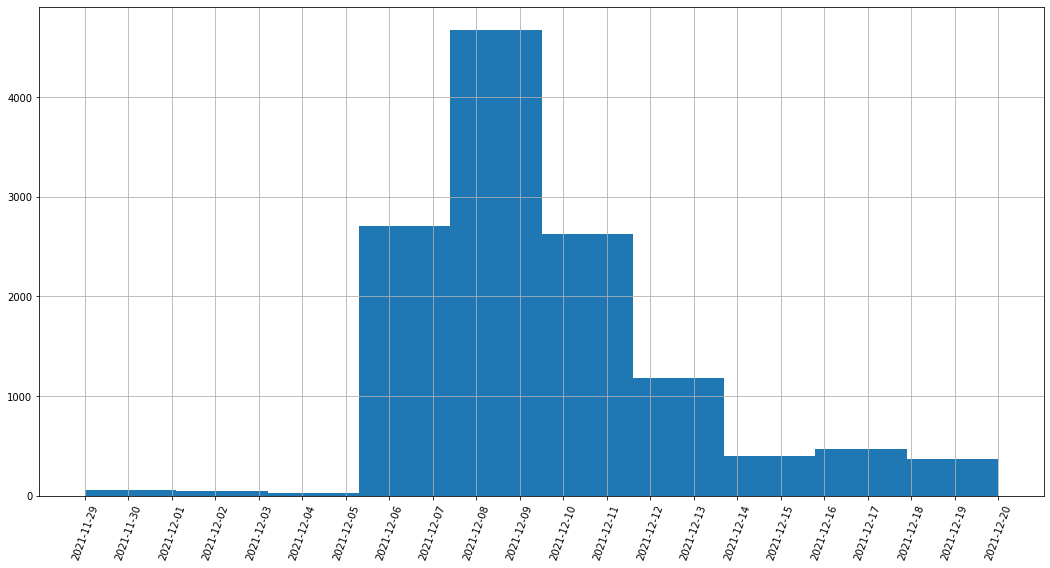

In [5]:
fig, axs = plt.subplots(figsize=(18, 9), nrows=1, ncols=1)

db["v_date"].sort_values().hist()
plt.xticks(rotation=70)
plt.show()

In [6]:
reviews = db[db["v_date"] <= "2021-12-05"]["v_content"].tolist()

In [7]:
reviews[:5]

['Банят сразу после оплаты',
 'Очень красивое место',
 'Огонь',
 'Много интересных предложений и функций  Благодарна разработчикам вы ребята молодцы Успехов вам в новых разработках',
 'Не очень Хорошо бы находили объявления по запросу']

In [8]:
reviews = [x.strip().lower() for x in reviews]

In [9]:
reviews[:5]

['банят сразу после оплаты',
 'очень красивое место',
 'огонь',
 'много интересных предложений и функций  благодарна разработчикам вы ребята молодцы успехов вам в новых разработках',
 'не очень хорошо бы находили объявления по запросу']

In [10]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math
import numpy as np

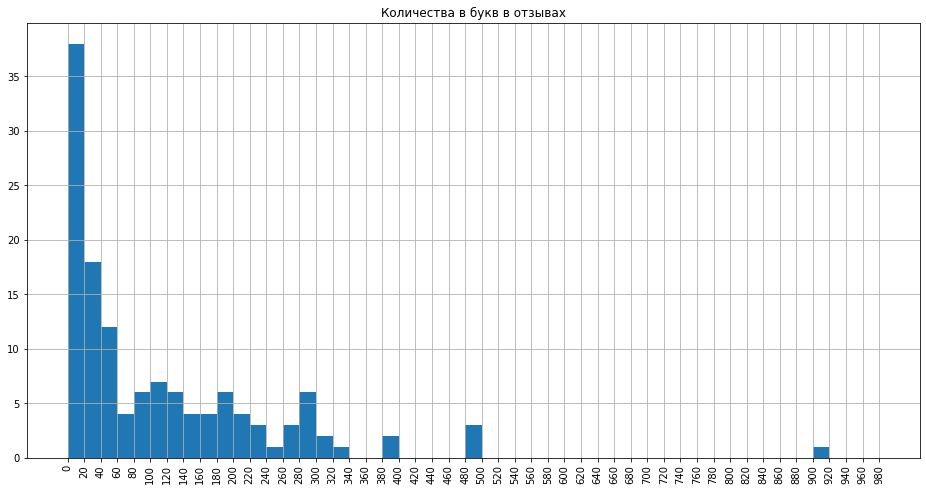

In [11]:
plt.figure(figsize=(16, 8))
plt.hist([len(x) for x in reviews], bins=np.arange(0, 1000, 20), rwidth=1)
plt.grid()
plt.title("Количества в букв в отзывах")
plt.xticks(np.arange(0, 1000, 20), rotation=90)
plt.show()

### Пробуем разбить отзывы на предложения.

In [12]:
import nltk
# nltk.download("punkt")

In [13]:
from nltk.tokenize import sent_tokenize

In [14]:
len_sorted_reviews = sorted(reviews, key=lambda x: len(x), reverse=True)

In [15]:
longest_review = len_sorted_reviews[1]

In [16]:
len_sorted_reviews[-10:]

['супер', 'super', 'super', 'na', 'ок', 'na', 'na', 'ке', 'na', 'na']

In [17]:
longest_review

'по новым правилам что бы разместить объявление собственник должен передать все свои паспортные данные на сайт в лучших традициях микрофинансовых организациймолодцыпосле по всей видимости сливаете полученные данные что ж неплохой способ подработкипод предлогом борьбы с мошенниками сами занимаетесь некрасивыми деламивы не являетесь представителями власти и требование обнародовать паспортные данные по меньшей мере незаконновы всего лишь создатели мобильного приложения с амбициями'

In [18]:
sent_tokenize(longest_review.replace(".", "."))

['по новым правилам что бы разместить объявление собственник должен передать все свои паспортные данные на сайт в лучших традициях микрофинансовых организациймолодцыпосле по всей видимости сливаете полученные данные что ж неплохой способ подработкипод предлогом борьбы с мошенниками сами занимаетесь некрасивыми деламивы не являетесь представителями власти и требование обнародовать паспортные данные по меньшей мере незаконновы всего лишь создатели мобильного приложения с амбициями']

In [19]:
sent_tokenize(longest_review.replace(".", " . "))

['по новым правилам что бы разместить объявление собственник должен передать все свои паспортные данные на сайт в лучших традициях микрофинансовых организациймолодцыпосле по всей видимости сливаете полученные данные что ж неплохой способ подработкипод предлогом борьбы с мошенниками сами занимаетесь некрасивыми деламивы не являетесь представителями власти и требование обнародовать паспортные данные по меньшей мере незаконновы всего лишь создатели мобильного приложения с амбициями']

In [20]:
sentenced_reviews = []

for review in reviews:
    sentenced_reviews += sent_tokenize(review.replace(".", " . "))

In [21]:
def has_alpha(x):
    return len(x) > 0 and max([l.isalpha() for l in x])

In [22]:
len(reviews), len(sentenced_reviews), len([x for x in sentenced_reviews if has_alpha(x)])

(131, 131, 131)

In [23]:
reviews = [x for x in sentenced_reviews if has_alpha(x)]

In [24]:
comma_split_reviews = []

for review in reviews:
    comma_split_reviews += review.split(",")

In [25]:
len(reviews), len(comma_split_reviews)

(131, 131)

In [26]:
reviews = [x for x in comma_split_reviews if has_alpha(x) and len(x) >= 5]

In [27]:
len(reviews)

124

### Токенизируем: с нормализацией и без

In [28]:
from collections import defaultdict
import matplotlib.pyplot as plt
import math
import numpy as np

In [29]:
import string
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer, TreebankWordTokenizer
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
stop_words.extend([x for x in string.punctuation] + ["«", "»", "это", "!", "!!", "!!!", "??"])
stop_words.remove("только")

In [30]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

def normalize(x):
    return morph.parse(x)[0].normal_form

def extract_POS(x):
    return morph.parse(x)[0].tag.POS or "None"

In [31]:
tokenized_reviews = []
normalized_reviews = []

for r in reviews:
    tokens = [x for x in WordPunctTokenizer().tokenize(r) if x not in stop_words]
    tokens = [x for x in tokens if has_alpha(x)]
    tokenized_reviews.append(tokens)
    normalized_reviews.append([normalize(x) for x in tokens])

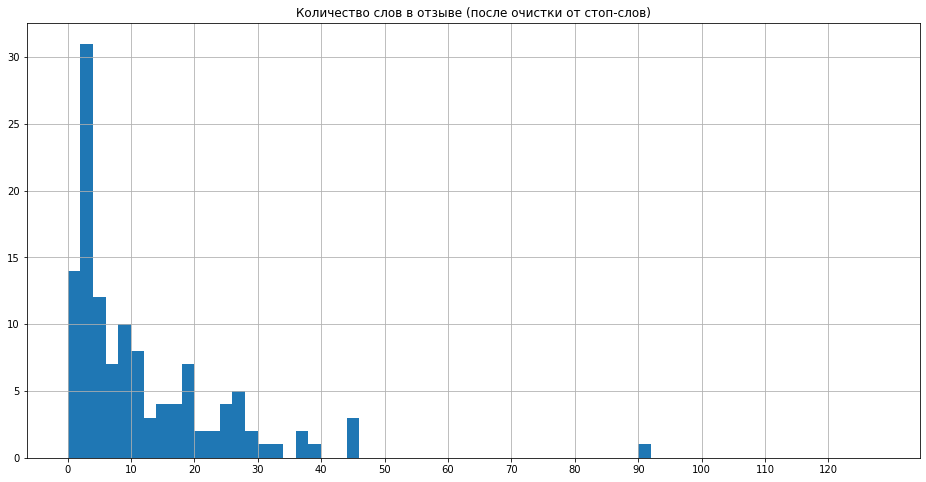

In [32]:
plt.figure(figsize=(16, 8))
plt.hist([len(x) for x in tokenized_reviews], bins=np.arange(0, 130, 2), rwidth=1)
plt.grid()
plt.title("Количество слов в отзыве (после очистки от стоп-слов)")
plt.xticks(np.arange(0, 130, 10))
plt.show()

In [33]:
POS_arr = []
for r in tokenized_reviews:
    POS_arr += [extract_POS(x) for x in r]

In [34]:
pos_counter = Counter(POS_arr)

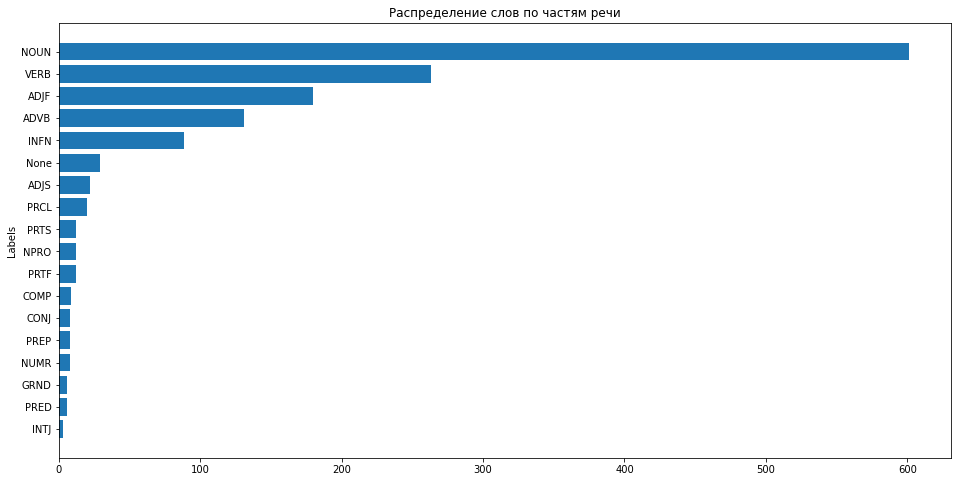

In [35]:
ntop = len(pos_counter)
xs = np.arange(len(pos_counter))
ys = [y for x, y in pos_counter.most_common(ntop)][::-1]
labels = [x for x, y in pos_counter.most_common(ntop)][::-1]

plt.figure(figsize=(16, 8))
plt.title("Распределение слов по частям речи")

plt.barh(xs, ys)
plt.yticks(xs, labels=[x + "" for x in labels])
plt.ylabel("Labels")
plt.show()

Расшифровка тэгов:
https://pymorphy2.readthedocs.io/en/stable/user/grammemes.html#grammeme-docs

### Считаем частоты  n-грамм

In [36]:
def make_n_grams(arr, n, sep=" "):
    return [sep.join(arr[i:i+n]) for i in range(len(arr) - min(len(arr), n) + 1)]

In [37]:
N = 4

In [38]:
n_grams = defaultdict(list)
for tokens in tokenized_reviews:
    for i in range(1, N + 1):
        if len(tokens) >= i:
            n_grams[i] += make_n_grams(tokens, i)

In [39]:
counters = {}
for key, value in n_grams.items():
    counters[key] = Counter(value)

In [40]:
import pandas as pd

In [41]:
data = []
for key in counters.keys():
    for x, y in counters[key].items():
        data.append([key, x, y])
        
db = pd.DataFrame(data=data, columns=["ngram_len", "ngram", "cnt"])

In [42]:
db = db.sort_values(by=["ngram_len", "cnt"], ascending=[True, False], ignore_index=True)

In [43]:
db

,ngram_len,ngram,cnt
0,1,приложение,37
1,1,очень,19
2,1,объявления,19
3,1,циан,18
4,1,всё,10
...,...,...,...
3580,4,нормально вставлять скриншоты общении,1
3581,4,вставлять скриншоты общении чате,1
3582,4,скриншоты общении чате поддержки,1
3583,4,общении чате поддержки тд,1


In [44]:
db.to_csv("ngrams.csv")

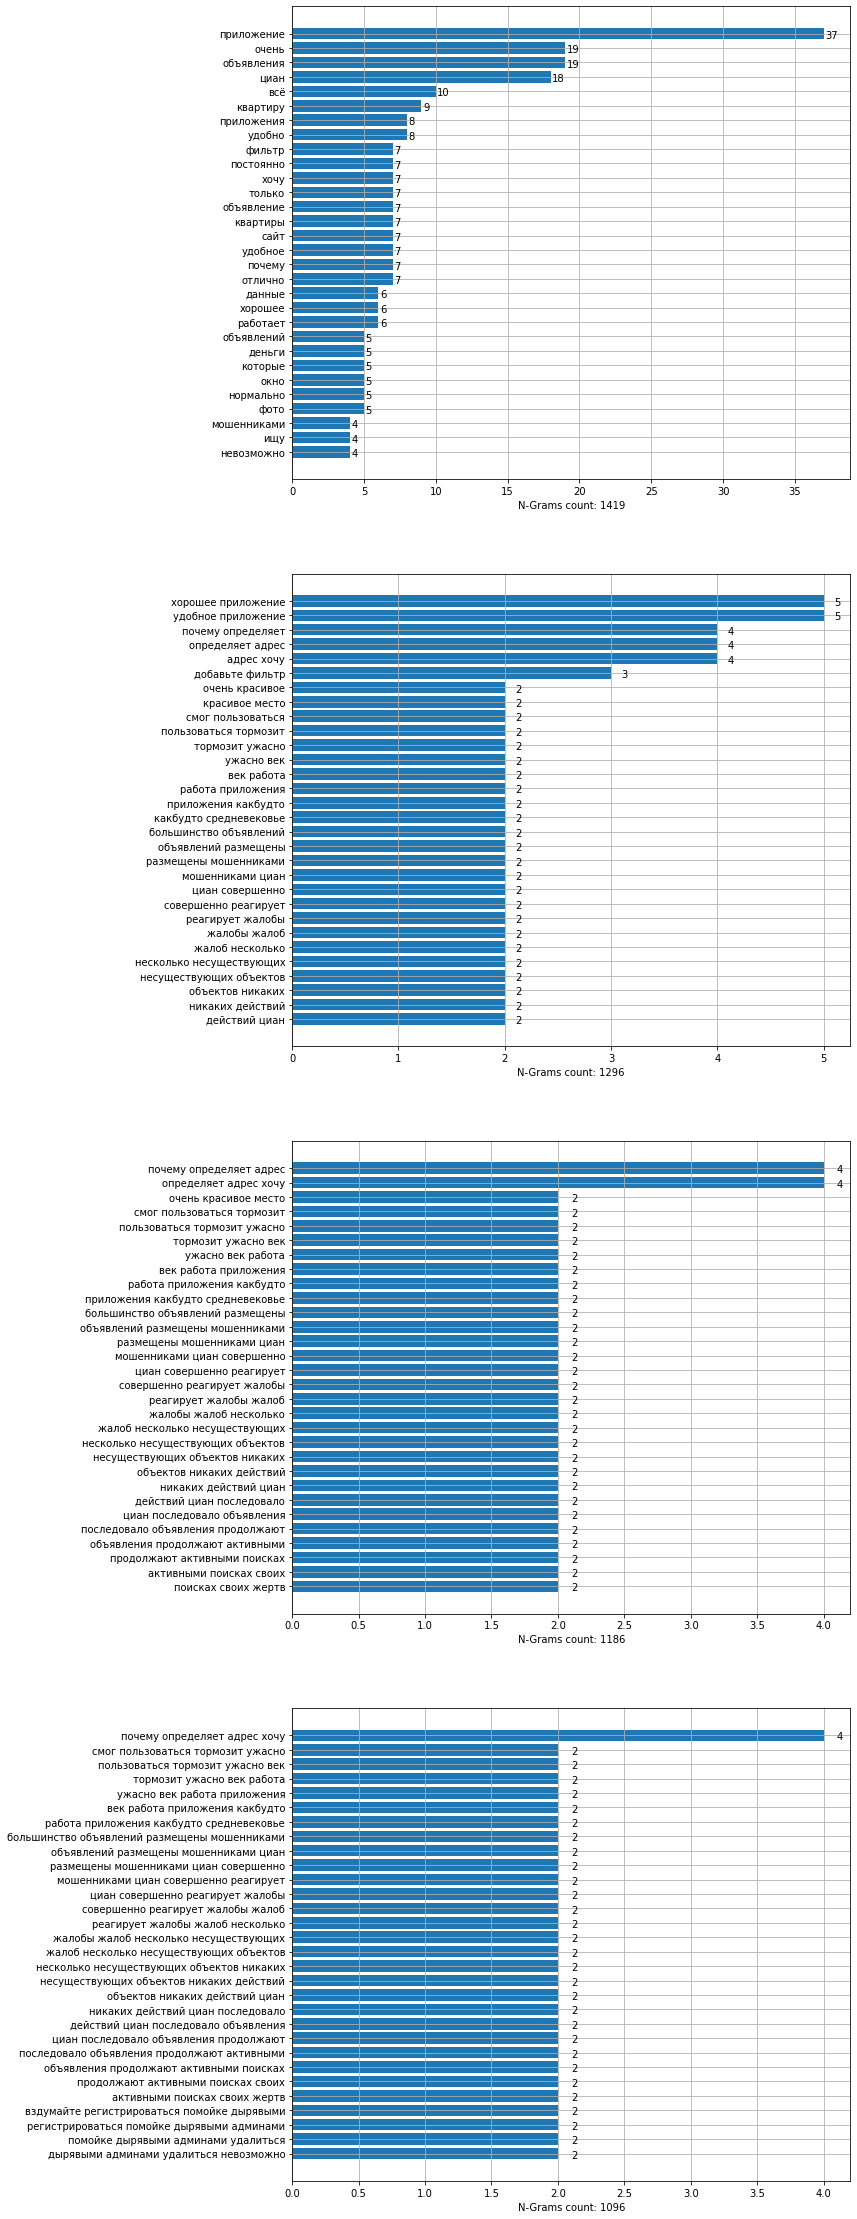

In [45]:
ncols = 1
nrows = math.ceil(N / ncols)
ntop = 30

fig, axs = plt.subplots(figsize=(10 * ncols, 10 * nrows), ncols=ncols, nrows=nrows)

keys = []

for i, key in enumerate(counters.keys()):
    ax = axs.reshape(-1)[i]
    xs = np.arange(ntop)
    ys = [y for x, y in counters[key].most_common(ntop)][::-1]
    labels = [x for x, y in counters[key].most_common(ntop)][::-1]
    ax.grid()
    ax.barh(xs, ys)
    ax.set_yticks(xs)
    ax.set_yticklabels(labels, rotation=0)
    ax.set_xlabel("N-Grams count: {}".format(sum([value for value in counters[key].values()])))
    for x, y in zip(xs, ys):
        ax.annotate(str(y), xy=(y, x), xytext=(y + 0.1, x - 0.3))

plt.show()

### То же самое, но с нормализацией

In [46]:
n_grams = defaultdict(list)
for tokens in normalized_reviews:
    for i in range(1, N + 1):
        if len(tokens) >= i:
            n_grams[i] += make_n_grams(tokens, i)

In [47]:
counters = {}
for key, value in n_grams.items():
    counters[key] = Counter(value)

In [48]:
data = []
for key in counters.keys():
    for x, y in counters[key].items():
        data.append([key, x, y])
        
db = pd.DataFrame(data=data, columns=["ngram_len", "ngram", "cnt"])
db = db.sort_values(by=["ngram_len", "cnt"], ascending=[True, False], ignore_index=True)
db.to_csv("normalized_ngrams.csv")

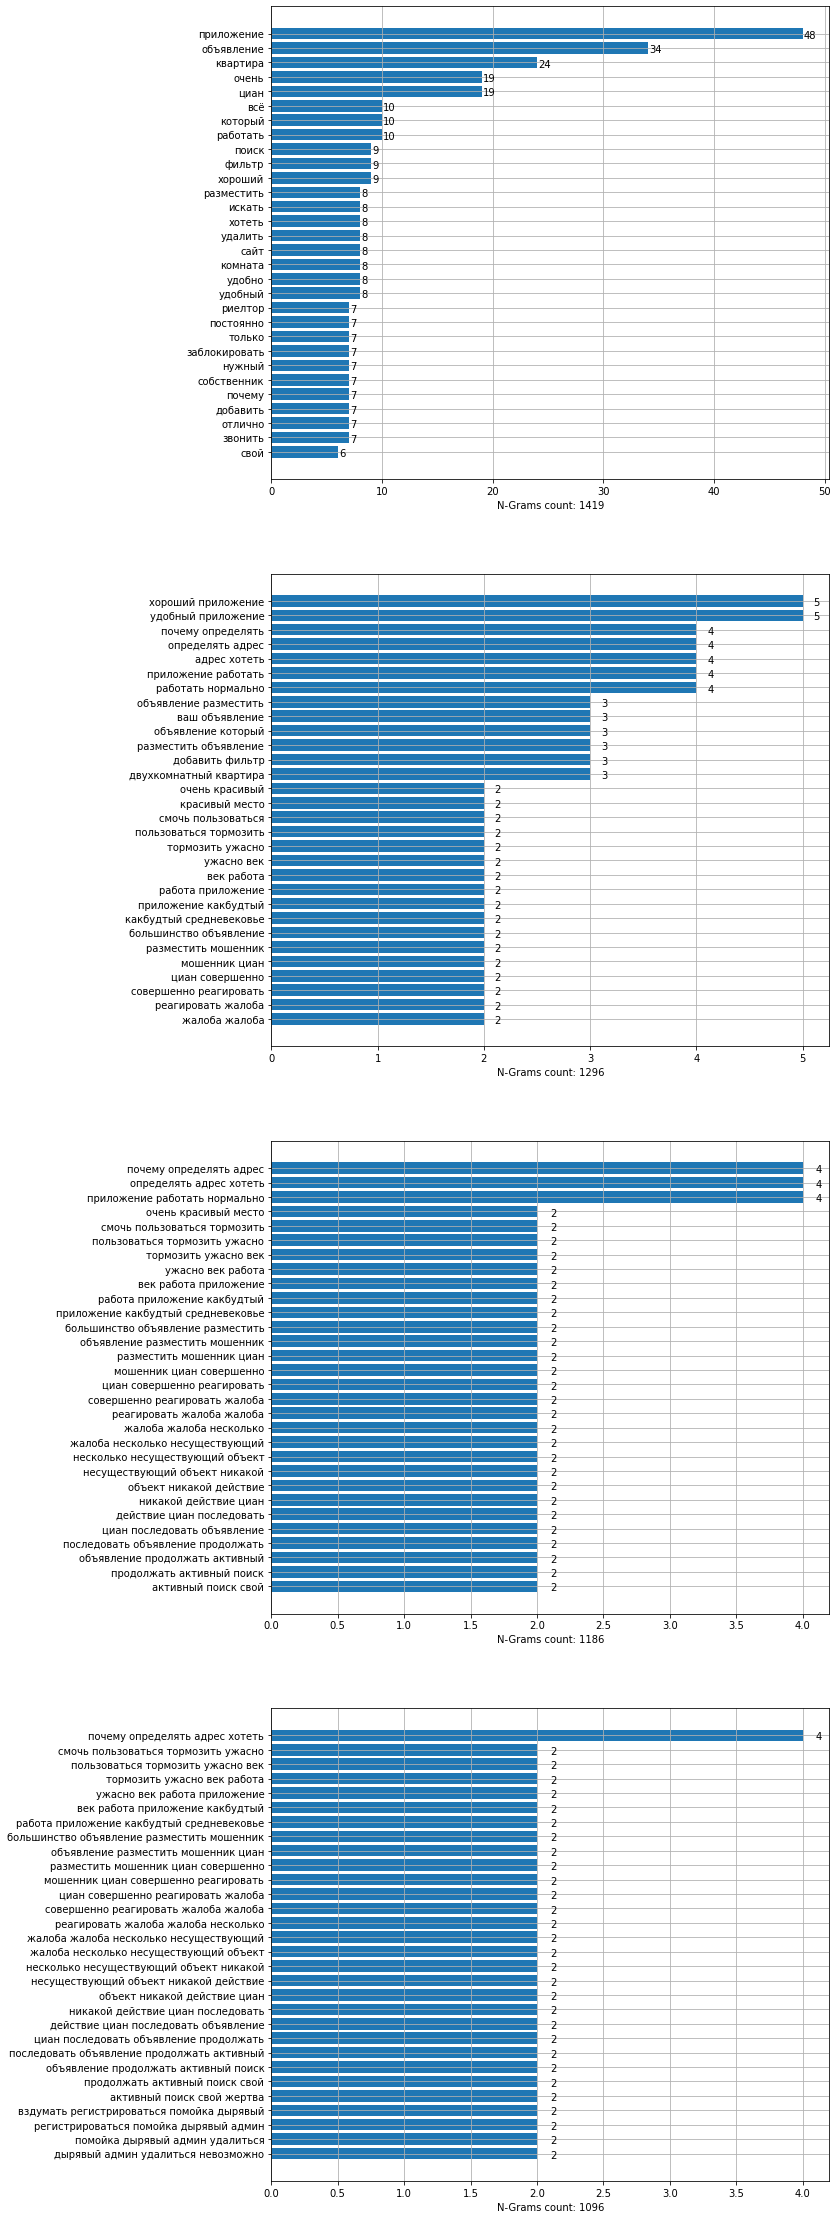

In [49]:
ncols = 1
nrows = math.ceil(N / ncols)
ntop = 30

fig, axs = plt.subplots(figsize=(10 * ncols, 10 * nrows), ncols=ncols, nrows=nrows)

keys = []

for i, key in enumerate(counters.keys()):
    ax = axs.reshape(-1)[i]
    xs = np.arange(ntop)
    ys = [y for x, y in counters[key].most_common(ntop)][::-1]
    labels = [x for x, y in counters[key].most_common(ntop)][::-1]
    ax.grid()
    ax.barh(xs, ys)
    ax.set_yticks(xs)
    ax.set_yticklabels(labels, rotation=0)
    ax.set_xlabel("N-Grams count: {}".format(sum([value for value in counters[key].values()])))
    for x, y in zip(xs, ys):
        ax.annotate(str(y), xy=(y, x), xytext=(y + 0.1, x - 0.3))

plt.show()

## Некоторые примеры

In [50]:
examples = [
    "славянин славянин",
    "дискриминация славянин дискриминация славянин",
]

dct = {x:[] for x in examples}

for i, x in enumerate(normalized_reviews):
    key = " ".join(x)
    if key in examples:
        dct[key].append(reviews[i])
        
for key, value in dct.items():
    print(key)
    for x in value:
        print("\t- " + x)
    print("---")

славянин славянин
---
дискриминация славянин дискриминация славянин
---


## Word Embeddings

In [51]:
import gensim.downloader

In [52]:
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [53]:
word_embeddings = gensim.downloader.load("word2vec-ruscorpora-300")

In [54]:
def review2vec(review, model):
    res = np.zeros(300)
    cnt = 0
    for word in review:
        pos = extract_POS(word)
        key = word + "_" + pos
        if key in model:
            res += model[key]
            cnt += 1
    return res / max(cnt, 1)

In [55]:
w2v_reviews = []
for r in normalized_reviews:
    w2v_reviews.append(review2vec(r, word_embeddings))

In [56]:
w2v_reviews = np.array(w2v_reviews)
w2v_reviews.shape

(124, 300)

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=2)
pca_words = pca.fit_transform(w2v_reviews)

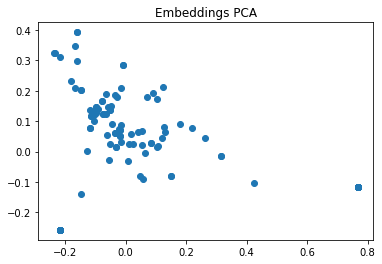

In [59]:
plt.scatter(pca_words[:, 0], pca_words[:, 1])
plt.title("Embeddings PCA")
plt.show()

In [60]:
from sklearn.cluster import DBSCAN, KMeans

In [61]:
eps = 1e-3
min_samples = 10

db = DBSCAN(eps=eps, metric="euclidean", min_samples=min_samples).fit(w2v_reviews)

labels = db.labels_
len(set(labels))

3

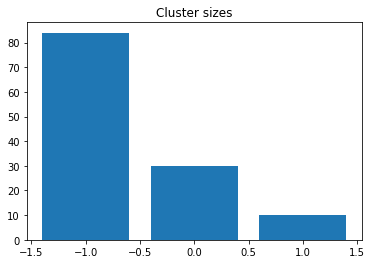

In [62]:
words = np.array(reviews)
normed_words = np.array([" ".join(x) for x in normalized_reviews])

clusters = {}
normed_clusters = {}
sizes = {}
for label in set(labels):
    cluster = words[labels == label]
    normed_cluster = normed_words[labels == label]
    sizes[label] = len(cluster)
    clusters[label] = cluster
    normed_clusters[label] = normed_cluster
    
sizes_list = np.array(sorted([(x, y) for x,y in sizes.items()], key=lambda x: x[1], reverse=True))

plt.title("Cluster sizes")
plt.bar(sizes_list[:, 0], sizes_list[:, 1])
plt.show()

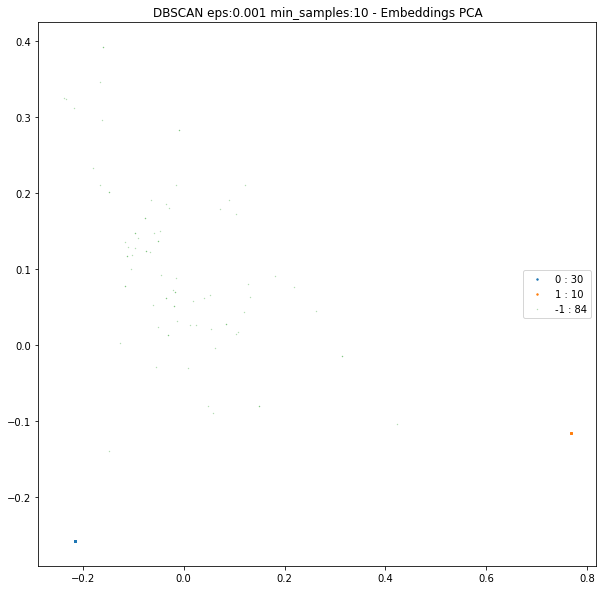

In [63]:
plt.figure(figsize=(10, 10))
for i in set(labels):
    s, a = (2, 1) if i != -1 else (0.1, 0.5)
    label = "{} : {}".format(i, sum(labels == i)) # if i != -1 else ""
    plt.scatter(
        pca_words[labels == i, 0], 
        pca_words[labels == i, 1],
        s=s,
        alpha=a,
        label=label)
plt.legend(loc=5)
plt.title("DBSCAN eps:{} min_samples:{} - Embeddings PCA".format(eps, min_samples))
plt.show()

In [64]:
n_top_clusters_to_plot = 1

sizes_to_plot = sizes_list[n_top_clusters_to_plot:, ]
sizes_to_plot = sizes_to_plot[sizes_to_plot[:, 1] > min_samples]

print("{} clusters cover {} reviews from {}".format(
    sizes_to_plot.shape[0],
    sum(sizes_to_plot[:, 1]),
    words.shape[0]
))

1 clusters cover 30 reviews from 124


In [65]:
n_top_clusters_to_plot = 0

sizes_to_plot = sizes_list[n_top_clusters_to_plot:, ]
sizes_to_plot = sizes_to_plot[sizes_to_plot[:, 1] > min_samples]

print("{} clusters cover {} reviews from {}".format(
    sizes_to_plot.shape[0],
    sum(sizes_to_plot[:, 1]),
    words.shape[0]
))

2 clusters cover 114 reviews from 124


In [66]:
n_examples = 15

for x in sizes_to_plot:
    print("Label {}, Cluster size: {}".format(x[0], x[1]))
    for review, normed_review in zip(clusters[x[0]][:n_examples], normed_clusters[x[0]][:n_examples]):
        print("\t- " + review) #+ " /\n\t\t (" + normed_review + ")")
    print("\n")

Label -1, Cluster size: 84
	- банят сразу после оплаты
	- очень красивое место
	- огонь
	- много интересных предложений и функций  благодарна разработчикам вы ребята молодцы успехов вам в новых разработках
	- не очень хорошо бы находили объявления по запросу
	- норм прилажуха
	- спасиба братани
	- не смог пользоваться тормозит ужасно  век а работа приложения какбудто средневековье
	- большинство объявлений размещены мошенниками и циан совершенно не реагирует на жалобы после жалоб на несколько несуществующих объектов никаких действий от циан не последовало объявления продолжают быть активными в поисках своих жертв
	- приложение не умеет запоминать настройки фильтров даже в пределах одной юзерсессии позор uxui дизайнеру
	- поясилось окошко подобрать риэлтора зачем занимает пол экрана мешает и раздражает даже бесит я не риэлтора ищу а объект фильтр постоянно врёт запрашиваешь ижс выдает снт информацию и параметры никто не проверяет
	- хочу предупредить  не размещайте свои объявления на ци

In [67]:
data = []

for x in sizes_to_plot:
    label = x[0]
    cluster_size = x[1]
    for review, normed_review in zip(clusters[label], normed_clusters[label]):
        data.append([label, cluster_size, review, normed_review])
        
        
db = pd.DataFrame(data=data, columns=["cluster_label", "cluster_size", "review", "normed_review"])
db.to_csv("processed_data/big_sample/early_reviews_clustered.csv")